# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

In [3]:
cities

['rongelap',
 'laikit, laikit ii (dimembe)',
 'mahina',
 "st. john's",
 'khandyga',
 'tofol',
 'margaret river',
 'puerto baquerizo moreno',
 'adamstown',
 'sao jose da coroa grande',
 'rio de janeiro',
 'bethel',
 'bargarh',
 'new norfolk',
 'campobasso',
 'waitangi',
 'isafjordur',
 'thompson',
 'san patricio',
 'shcherbinka',
 'mbanza kongo',
 'san jose village',
 'ciudad melchor muzquiz',
 'kawambwa',
 'bonthe',
 'invercargill',
 'grytviken',
 'gadzhiyevo',
 'petropavlovsk-kamchatsky',
 'happy valley-goose bay',
 'mount pearl',
 'kingston',
 'inarajan village',
 'mirpur sakro',
 'bom jardim',
 'udachny',
 'tazovsky',
 'port elizabeth',
 'yellowknife',
 'port-aux-francais',
 'lerwick',
 'anadyr',
 'rio gallegos',
 'afaahiti',
 'pithiviers',
 'wynyard',
 'fort mcmurray',
 'sawakin',
 'san jose de jachal',
 'finley',
 'edinburgh of the seven seas',
 'horta',
 'lihue',
 'ushuaia',
 'sarupathar',
 'minas de matahambre',
 'remire-montjoly',
 'constantia',
 'alice springs',
 'motueka',
 '

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
import time
import requests

# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if i % 50 == 0 and i >= 50:
        set_count += 1
        record_count = 0
        time.sleep(10)

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    #print(city_url)

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]  # Fixed the key to "lon"
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]  # Removed brackets around "main" and "humidity"
        city_clouds = city_weather["clouds"]["all"]  # Removed brackets around "clouds" and "all"
        city_wind = city_weather["wind"]["speed"]  # Removed brackets around "wind" and "speed"
        city_country = city_weather["sys"]["country"]  # Removed brackets around "sys" and "country"
        city_date = city_weather["dt"]  # Removed brackets around "dt"

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | rongelap
Processing Record 2 of Set 1 | laikit, laikit ii (dimembe)
Processing Record 3 of Set 1 | mahina
Processing Record 4 of Set 1 | st. john's
Processing Record 5 of Set 1 | khandyga
Processing Record 6 of Set 1 | tofol
Processing Record 7 of Set 1 | margaret river
Processing Record 8 of Set 1 | puerto baquerizo moreno
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | sao jose da coroa grande
Processing Record 11 of Set 1 | rio de janeiro
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | bargarh
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | campobasso
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | isafjordur
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | san patricio
Processing Record 20 of Set 1 | shcherbinka
Processing Record 21 of Set 1 | mbanza kongo
Processing Record 

Processing Record 39 of Set 4 | bengkulu
Processing Record 40 of Set 4 | bilibino
Processing Record 41 of Set 4 | badger
Processing Record 42 of Set 4 | bratsk
Processing Record 43 of Set 4 | palikir - national government center
Processing Record 44 of Set 4 | lichuan
Processing Record 45 of Set 4 | lobujya
Processing Record 46 of Set 4 | tangalle
Processing Record 47 of Set 4 | pajok
Processing Record 48 of Set 4 | luderitz
Processing Record 49 of Set 4 | mayya
Processing Record 0 of Set 5 | iskateley
Processing Record 1 of Set 5 | barclayville
Processing Record 2 of Set 5 | gyumri
Processing Record 3 of Set 5 | nueva gerona
Processing Record 4 of Set 5 | ambon
Processing Record 5 of Set 5 | acarau
Processing Record 6 of Set 5 | usinsk
Processing Record 7 of Set 5 | sapri
Processing Record 8 of Set 5 | wellington
Processing Record 9 of Set 5 | port macquarie
Processing Record 10 of Set 5 | dudinka
Processing Record 11 of Set 5 | pocahontas
Processing Record 12 of Set 5 | nis
Processin

Processing Record 31 of Set 8 | antsiranana
Processing Record 32 of Set 8 | luxembourg
Processing Record 33 of Set 8 | kapa'a
Processing Record 34 of Set 8 | timimoun
Processing Record 35 of Set 8 | amga
Processing Record 36 of Set 8 | sechura
Processing Record 37 of Set 8 | kargil
Processing Record 38 of Set 8 | bodaybo
Processing Record 39 of Set 8 | dhuusamarreeb
Processing Record 40 of Set 8 | anchau
Processing Record 41 of Set 8 | cadale
Processing Record 42 of Set 8 | port saint john's
Processing Record 43 of Set 8 | fortuna
Processing Record 44 of Set 8 | seaside
Processing Record 45 of Set 8 | nagqu
Processing Record 46 of Set 8 | vila do maio
Processing Record 47 of Set 8 | nemuro
Processing Record 48 of Set 8 | oriximina
Processing Record 49 of Set 8 | fort bragg
Processing Record 0 of Set 9 | lubao
Processing Record 1 of Set 9 | shilka
Processing Record 2 of Set 9 | mountain home
Processing Record 3 of Set 9 | el alto
Processing Record 4 of Set 9 | ahau
City not found. Skipp

Processing Record 19 of Set 12 | forster
Processing Record 20 of Set 12 | oroqen zizhiqi
Processing Record 21 of Set 12 | arbroath
Processing Record 22 of Set 12 | bontang
Processing Record 23 of Set 12 | queenstown
Processing Record 24 of Set 12 | mishkino
Processing Record 25 of Set 12 | ceerigaabo
Processing Record 26 of Set 12 | kodar
Processing Record 27 of Set 12 | qarauyl
Processing Record 28 of Set 12 | tukrah
Processing Record 29 of Set 12 | taman'
Processing Record 30 of Set 12 | oamaru
Processing Record 31 of Set 12 | nur-sultan
Processing Record 32 of Set 12 | nikolayevsk-on-amure
Processing Record 33 of Set 12 | igrim
Processing Record 34 of Set 12 | barpeta
Processing Record 35 of Set 12 | fredericksburg
Processing Record 36 of Set 12 | jackson
Processing Record 37 of Set 12 | es castell
Processing Record 38 of Set 12 | maintirano
Processing Record 39 of Set 12 | corvallis
Processing Record 40 of Set 12 | sao gabriel da cachoeira
Processing Record 41 of Set 12 | jamjamal


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [6]:
# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rongelap,11.1635,166.8941,301.44,80,100,8.46,MH,1688911858
1,"laikit, laikit ii (dimembe)",1.4792,124.9735,295.62,100,40,1.03,ID,1688911858
2,mahina,-17.5065,-149.4890,297.02,78,20,1.54,PF,1688911858
3,st. john's,47.5649,-52.7093,289.81,95,100,2.57,CA,1688911800
4,khandyga,62.6667,135.6000,286.35,36,100,3.18,RU,1688911858
5,tofol,5.3248,163.0078,301.32,77,100,5.24,FM,1688911858
6,margaret river,-33.9500,115.0667,288.99,70,44,7.00,AU,1688911858
7,puerto baquerizo moreno,-0.9000,-89.6000,298.70,83,40,4.12,EC,1688911859
8,adamstown,-25.0660,-130.1015,294.37,71,100,6.39,PN,1688911684
9,sao jose da coroa grande,-8.8978,-35.1478,299.11,80,60,4.17,BR,1688911859


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rongelap,11.1635,166.8941,301.44,80,100,8.46,MH,1688911858
1,"laikit, laikit ii (dimembe)",1.4792,124.9735,295.62,100,40,1.03,ID,1688911858
2,mahina,-17.5065,-149.4890,297.02,78,20,1.54,PF,1688911858
3,st. john's,47.5649,-52.7093,289.81,95,100,2.57,CA,1688911800
4,khandyga,62.6667,135.6000,286.35,36,100,3.18,RU,1688911858


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

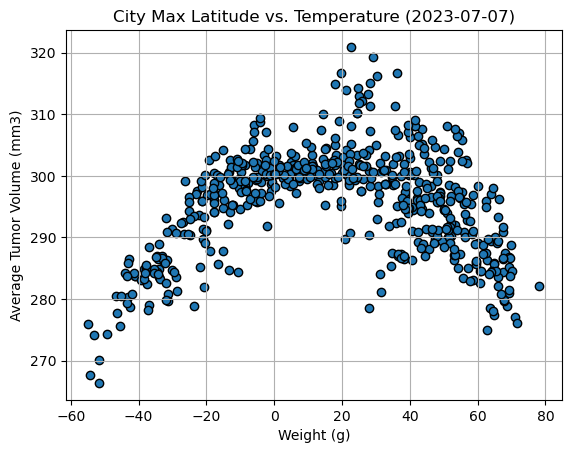

In [9]:
# Build scatter plot for latitude vs. temperature
latitude=city_data_df["Lat"]
temp=city_data_df["Max Temp"]

x_values=latitude
y_values=temp
plt.scatter(x_values, y_values, edgecolor="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-07-07)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

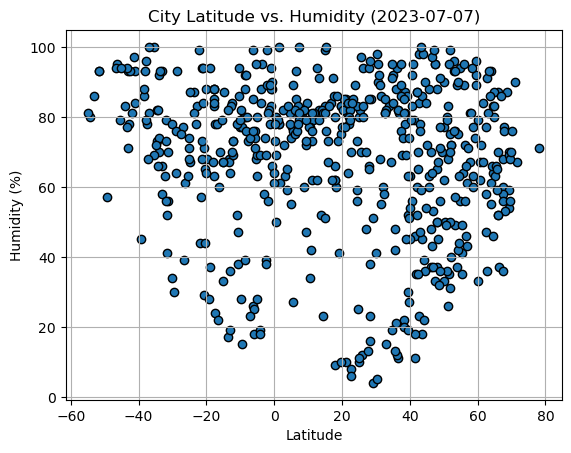

In [10]:
# Build the scatter plots for latitude vs. humidity
humidity=city_data_df["Humidity"]

x_values=latitude
y_values=humidity
plt.scatter(x_values, y_values, edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-07-07)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

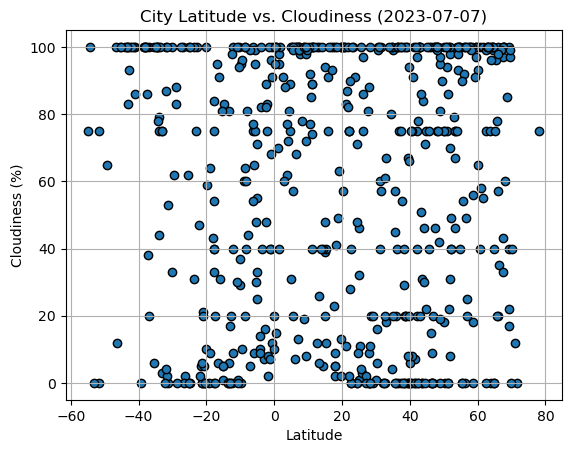

In [11]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness=city_data_df["Cloudiness"]

x_values=latitude
y_values=cloudiness
plt.scatter(x_values, y_values, edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-07-07)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

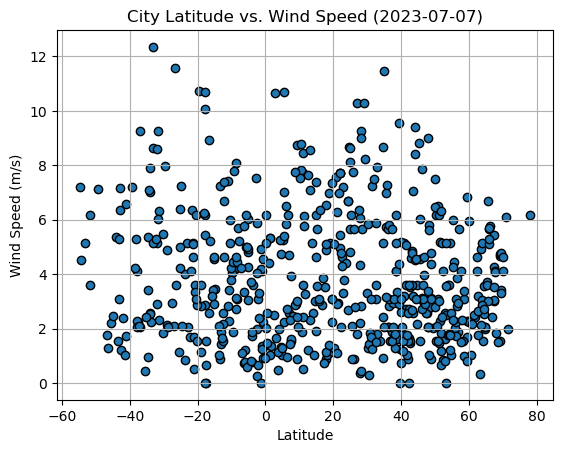

In [12]:
# Build the scatter plots for latitude vs. wind speed
wind=city_data_df["Wind Speed"]

x_values=latitude
y_values=wind
plt.scatter(x_values, y_values, edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-07-07)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rongelap,11.1635,166.8941,301.44,80,100,8.46,MH,1688911858
1,"laikit, laikit ii (dimembe)",1.4792,124.9735,295.62,100,40,1.03,ID,1688911858
3,st. john's,47.5649,-52.7093,289.81,95,100,2.57,CA,1688911800
4,khandyga,62.6667,135.6000,286.35,36,100,3.18,RU,1688911858
5,tofol,5.3248,163.0078,301.32,77,100,5.24,FM,1688911858


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,mahina,-17.5065,-149.4890,297.02,78,20,1.54,PF,1688911858
6,margaret river,-33.9500,115.0667,288.99,70,44,7.00,AU,1688911858
7,puerto baquerizo moreno,-0.9000,-89.6000,298.70,83,40,4.12,EC,1688911859
8,adamstown,-25.0660,-130.1015,294.37,71,100,6.39,PN,1688911684
9,sao jose da coroa grande,-8.8978,-35.1478,299.11,80,60,4.17,BR,1688911859


###  Temperature vs. Latitude Linear Regression Plot

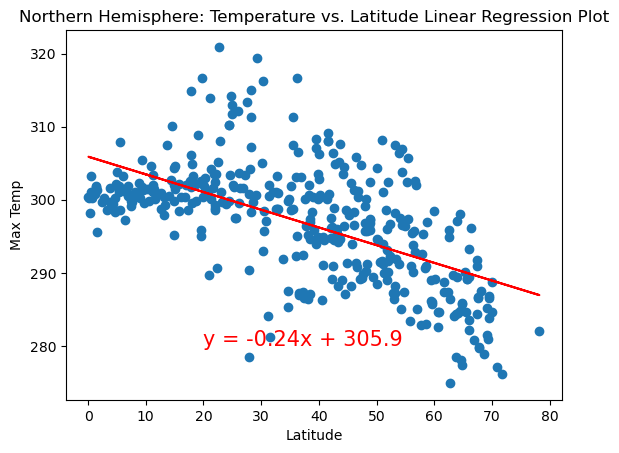

y = -0.24x + 305.9


In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data points and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20, 280), fontsize=15, color="red")

plt.title('Northern Hemisphere: Temperature vs. Latitude Linear Regression Plot')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.show()

print(line_eq)

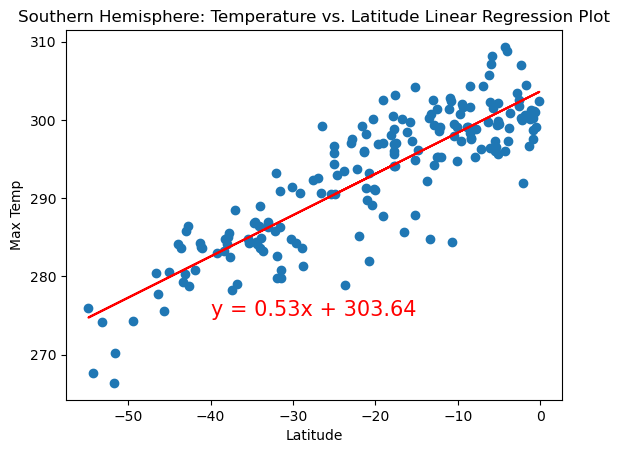

y = 0.53x + 303.64


In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data points and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-40, 275), fontsize=15, color="red")

plt.title('Southern Hemisphere: Temperature vs. Latitude Linear Regression Plot')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.show()

print(line_eq)

**Discussion about the linear relationship:** As latitude increases (as a city increases in distance from the equator), max temperatures decrease. This pattern holds in the Southern Hemisphere, as a city’s distance from the equator increases, the maximum temperature decreases. This implies that there is a negative relationship between the absolute value of latitude (distance from the equator) and max temperature. 

### Humidity vs. Latitude Linear Regression Plot

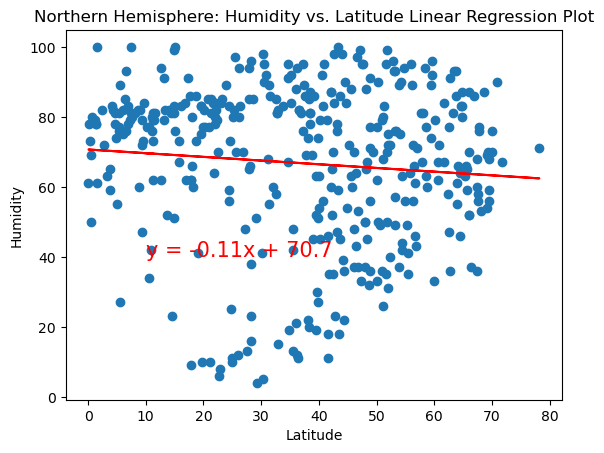

y = -0.11x + 70.7


In [18]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data points and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10, 40), fontsize=15, color="red")

plt.title('Northern Hemisphere: Humidity vs. Latitude Linear Regression Plot')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.show()

print(line_eq)

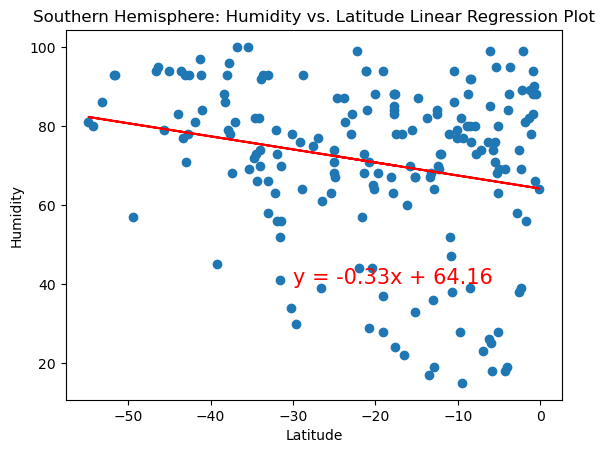

y = -0.33x + 64.16


In [25]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data points and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-30, 40), fontsize=15, color="red")

plt.title('Southern Hemisphere: Humidity vs. Latitude Linear Regression Plot')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.show()

print(line_eq)

**Discussion about the linear relationship:** There is a slightly negative relationship between latitude and humidity. As the distance from the equator increases, the humidity decreases. However, the slope of both regression lines is quite far from 1, and the line is not very steep. 

### Cloudiness vs. Latitude Linear Regression Plot

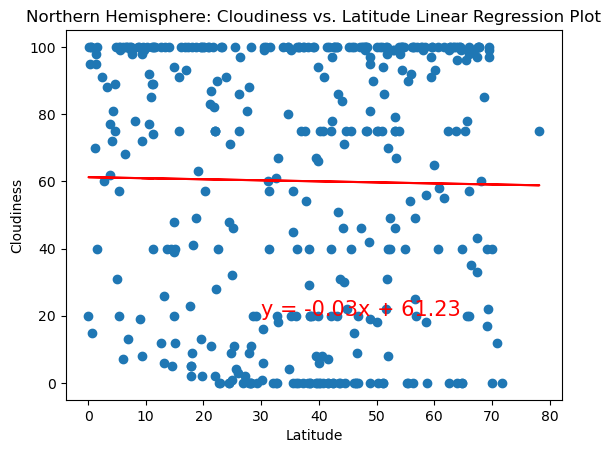

y = -0.03x + 61.23


In [20]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data points and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (30, 20), fontsize=15, color="red")

plt.title('Northern Hemisphere: Cloudiness vs. Latitude Linear Regression Plot')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.show()

print(line_eq)

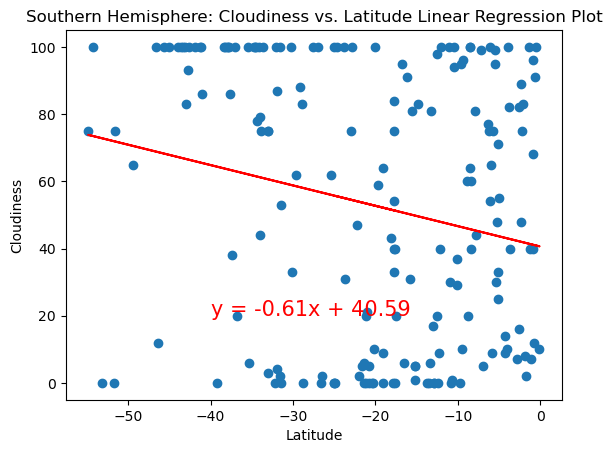

y = -0.61x + 40.59


In [21]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data points and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-40, 20), fontsize=15, color="red")

plt.title('Southern Hemisphere: Cloudiness vs. Latitude Linear Regression Plot')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.show()

print(line_eq)

**Discussion about the linear relationship:** There is a negative relationship between the absolute value of latitude (distance from the equator) and cloudiness. As a city’s distance from the equator increases, the cloudiness reduces. This pattern applies in both the northern and southern hemispheres. 

### Wind Speed vs. Latitude Linear Regression Plot

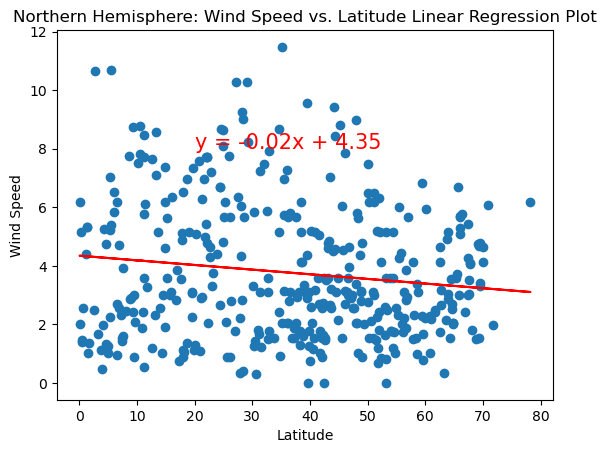

y = -0.02x + 4.35


In [24]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data points and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20, 8), fontsize=15, color="red")

plt.title('Northern Hemisphere: Wind Speed vs. Latitude Linear Regression Plot')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.show()

print(line_eq)

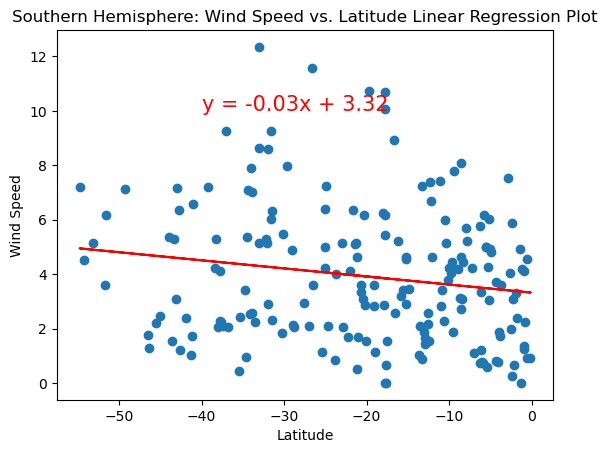

y = -0.03x + 3.32


In [23]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data points and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-40, 10), fontsize=15, color="red")

plt.title('Southern Hemisphere: Wind Speed vs. Latitude Linear Regression Plot')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.show()

print(line_eq)

**Discussion about the linear relationship:** The relationship between wind speed and latitude seems different in the Northern and Southern Hemispheres. In the Northern Hemisphere, as distance from the equator increases, wind speed decreases. In the Southern Hemisphere, as distance from the equator increases, wind speed increases. 